In [2]:
import pandas as pd  
data_path = './creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


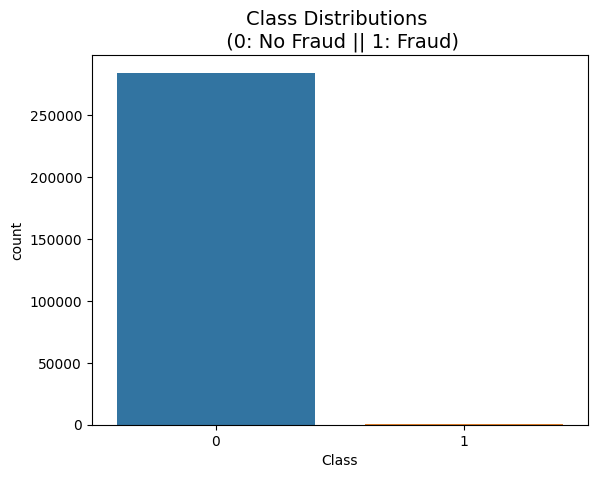

In [9]:
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.countplot(x = 'Class', data = raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize = 14)
plt.show()

In [10]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]
X.shape, y.shape

((284807, 29), (284807,))

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 13, stratify = y)

In [12]:
import numpy as np  
np.unique(y_train, return_counts = True)

(array([0, 1]), array([199020,    344]))

In [13]:
tmp = np.unique(y_train, return_counts = True)[1]
tmp[1]/len(y_train) * 100

0.17254870488152324

In [14]:
np.unique(y_test, return_counts = True)

(array([0, 1]), array([85295,   148]))

In [15]:
tmp = np.unique(y_test, return_counts = True)[1]
tmp[1]/len(y_test) * 100

0.17321489179921118

In [17]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = accuracy_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [18]:
from sklearn.metrics import confusion_matrix  

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('=================')
    
    print('Accuracy: {0:4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re,f1, auc))

In [20]:
from sklearn.linear_model import LogisticRegression  

lr_clf = LogisticRegression(random_state = 13, solver = 'liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy: 0.999169, Precision: 0.9992
Recall: 0.5946, F1: 0.7126, AUC: 0.7972


In [23]:
from sklearn.tree  import DecisionTreeClassifier  

dt_clf = DecisionTreeClassifier(random_state = 13, max_depth = 4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy: 0.999345, Precision: 0.9993
Recall: 0.7162, F1: 0.7910, AUC: 0.8580


In [24]:
from sklearn.ensemble import RandomForestClassifier  
rf_clf = RandomForestClassifier(random_state = 13, n_jobs = -1, n_estimators = 100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[85290     5]
 [   38   110]]
Accuracy: 0.999497, Precision: 0.9995
Recall: 0.7432, F1: 0.8365, AUC: 0.8716


In [27]:
from lightgbm import LGBMClassifier  
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)


[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [28]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return get_clf_eval(y_test, pred)

In [29]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
    return pd.DataFrame(tmp, columns = col_names, index = model_names)

In [30]:
import time  
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomRorest', 'LightGBM']
start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.999169,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.999345,0.716216,0.791045,0.858026
RandomRorest,0.999497,0.999497,0.743243,0.836502,0.871592
LightGBM,0.999532,0.999532,0.770270,0.850746,0.885100


/tmp/ipykernel_5867/178201515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color = 'r')
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_

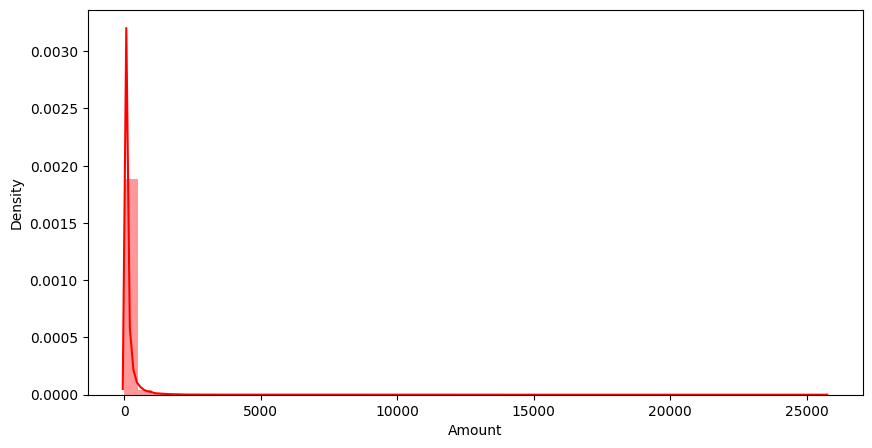

In [32]:
plt.figure(figsize = (10, 5))
sns.distplot(raw_data['Amount'], color = 'r')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [35]:
X_train, X_test, y_train, y_test = \
    train_test_split(raw_data_copy, y, test_size = 0.3,
                     random_state = 13, stratify = y)

In [36]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.999169,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.999345,0.716216,0.791045,0.858026
RandomForest,0.999497,0.999497,0.743243,0.836502,0.871592
LightGBM,0.999520,0.999520,0.763514,0.846442,0.881722


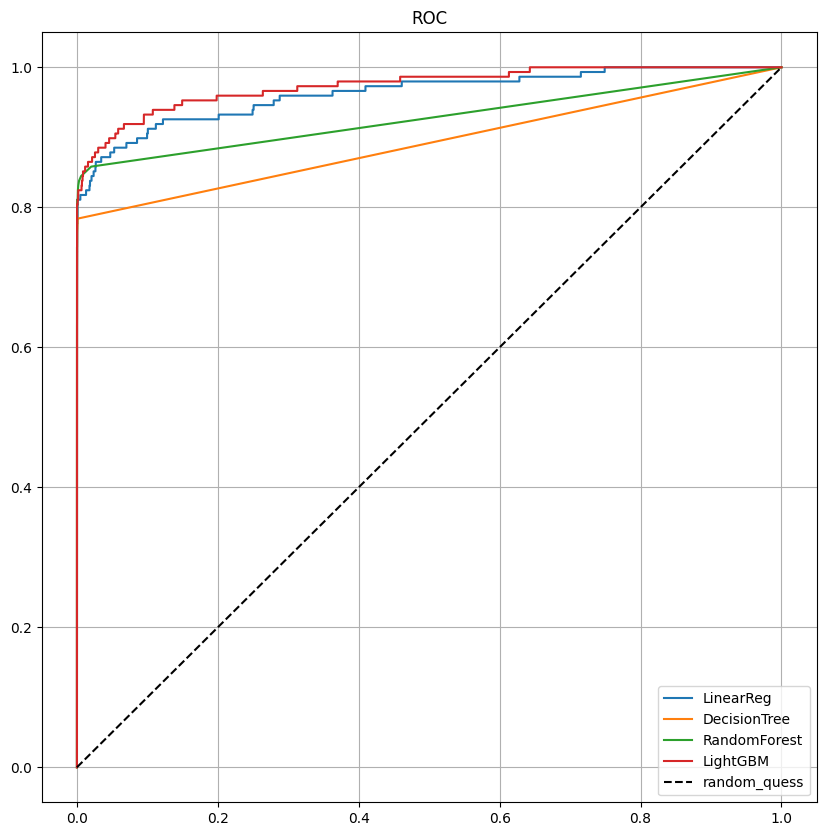

In [38]:
from sklearn.metrics import roc_curve  

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize = (10, 10))
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label = model_names[model])
    
    plt.plot([0, 1], [0, 1], 'k--', label = 'random_quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()
draw_roc_curve(models, model_names, X_test, y_test)

In [39]:
amount_log = np.log1p(raw_data['Amount'])
raw_data_copy['Amount_Scaled'] = amount_log  
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


/tmp/ipykernel_5867/852716231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color = 'r')
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('m

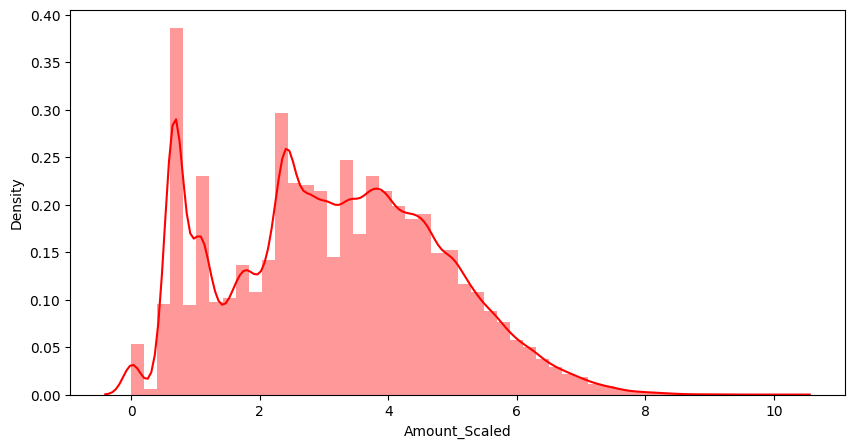

In [40]:
plt.figure(figsize = (10, 5))
sns.distplot(raw_data_copy['Amount_Scaled'], color = 'r')
plt.show()

In [41]:
X_train, X_test, y_trian, y_test = \
    train_test_split(raw_data_copy, y, test_size = 0.3, random_state = 13, stratify = y)
start_time = time.time()  
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999157,0.999157,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.999345,0.716216,0.791045,0.858026
RandomForest,0.999497,0.999497,0.743243,0.836502,0.871592
LightGBM,0.999532,0.999532,0.770270,0.850746,0.885100


/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aquila/venv/ml_study/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


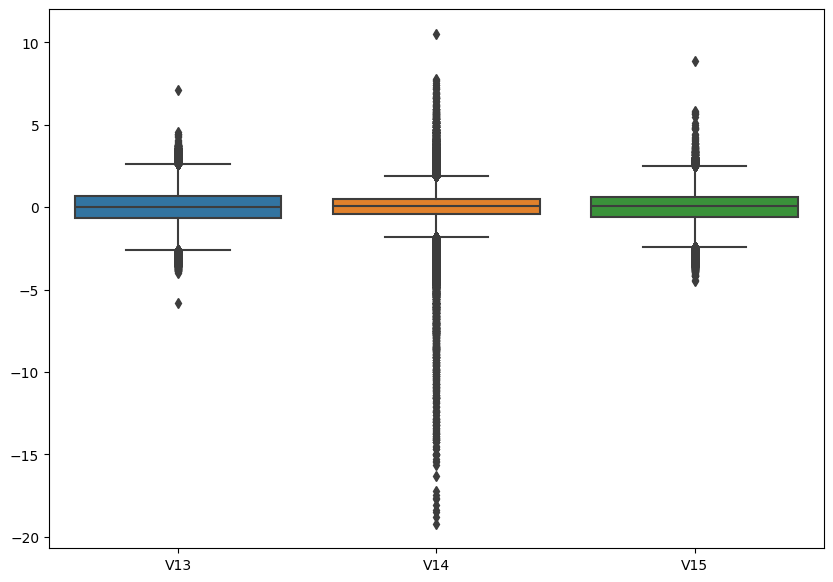

In [42]:
import seaborn as sns  
plt.figure(figsize = (10, 7))
sns.boxplot(data = raw_data[['V13', 'V14', 'V15']]);

In [44]:
def get_outlier(df = None, column = None, weight = 1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight  
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight  
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index  
    
    return outlier_index 

In [47]:
get_outlier(df = raw_data, column = 'V14', weight = 1.5)

Index([8296, 8615, 9035, 9252], dtype='int64')

## 6.4 Outlier 제거

In [48]:
raw_data_copy.shape

(284807, 29)

In [49]:
outlier_index = get_outlier(df = raw_data, column = 'V14', weight = 1.5)
raw_data_copy.drop(outlier_index, axis = 0, inplace = True)
raw_data_copy.shape

(284803, 29)

In [50]:
X = raw_data_copy
raw_data.drop(outlier_index, axis = 0, inplace = True)
y = raw_data.iloc[:, -1]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 13, stratify = y)

In [51]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg.', 'DecisionTree', 'RandomForest', 'LightGBM']
start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LinearReg.,0.999286,0.999286,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.999427,0.780822,0.823105,0.890311
RnadomForest,0.999497,0.999497,0.773973,0.840149,0.886928
LightGBM,0.999602,0.999602,0.808219,0.874074,0.904074


In [67]:
from imblearn.over_sampling import SMOTE  
smote = SMOTE(random_state = 13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [68]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [70]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [71]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts = True))

(array([0, 1]), array([199020,    342]))
(array([0, 1]), array([199020, 199020]))


In [72]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomForest', 'LightGBM']
start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

,accuracy,precision,recall,f1,roc_auc
LinearReg,0.975609,0.975609,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.968984,0.869863,0.087466,0.919509
RandomForest,0.999532,0.999532,0.849315,0.861111,0.924552
LightGBM,0.999532,0.999532,0.849315,0.861111,0.924552


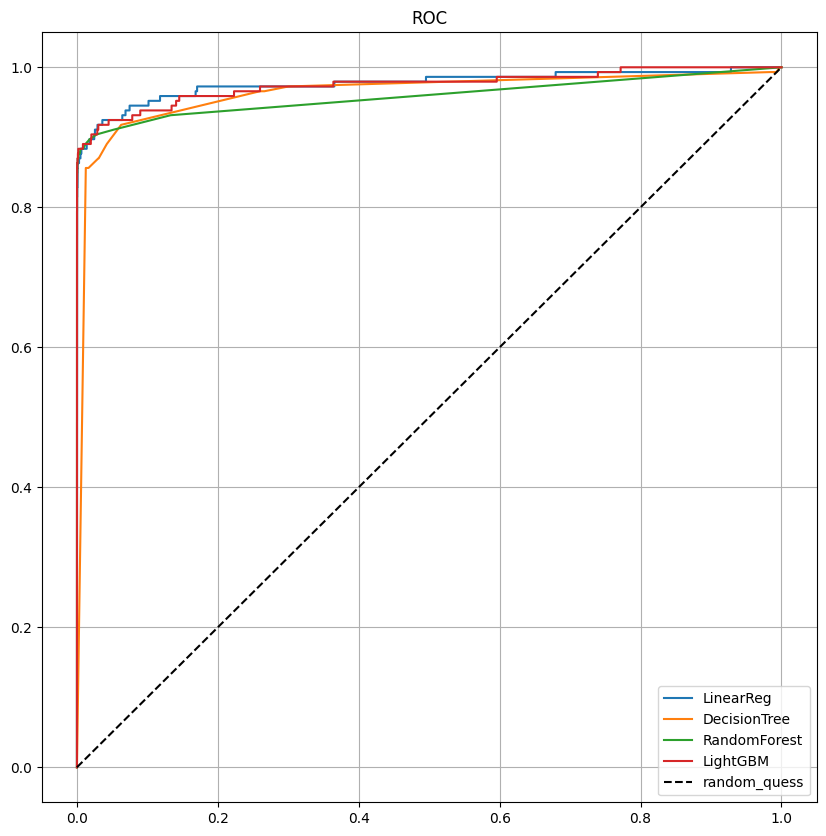

In [73]:
draw_roc_curve(models, model_names, X_test, y_test)